# PROJECT TITLE 
## customer churn prediction


# PROJECT OBJECTIVE 
This project is tailored specifically for a Telecommunication Company. Leveraging machine learning models and advanced analytics, this project aims to  understand patterns and forecast customer churn rates within the company's subscriber base.Learn more about classification models and help the client, a telecommunication company, to understand their data.
This will help in finding the lifetime value of each customer and know what factors affect the rate at which customers stop using their network.



## 1. Business understanding

### EXPLANATION OF FEATURES
1. customerID: A unique identifier assigned to each customer
2. gender: Indicates the gender of the customer,categorized as male or female	
3. SeniorCitizen: This demographic information helps segment customers based on age.	
4. Partner: Indicates whether the customer has a partner
5. Dependents: Indicates whether the customer has dependents (e.g., children or others relying on their service)	
6. tenure: Represents the length of time (usually in months) that the customer has been subscribed to the service.
7. PhoneService: Indicates whether the customer has subscribed to phone services provided by the company.
8. MultipleLines: Indicates whether the customer has multiple phone lines as part of their service package.
9. InternetService: Specifies the type of internet service subscribed to by the customer 
10. OnlineSecurity: Indicates whether the customer has an online security add-on as part of their internet service.
11. OnlineBackup: Indicates whether the customer has an online backup service for data as part of their internet package.	
12. DeviceProtection: Indicates whether the customer has device protection services (e.g., insurance or warranty) for their devices.
13. TechSupport: Indicates whether the customer has technical support services included in their subscription.
14. StreamingTV: Indicates whether the customer has subscribed to streaming TV services from the provider.
15. StreamingMovies: Indicates whether the customer has subscribed to streaming movie services from the provider.
16. Contract: Specifies the type of contract the customer has.	
17. PaperlessBilling: Indicates whether the customer receives electronic bills instead of paper bills.	
18. PaymentMethod: Specifies the method the customer uses to make payments.	
19. MonthlyCharges: Represents the amount charged to the customer monthly for the subscribed services.	
20. TotalCharges: Represents the total amount charged to the customer over their entire tenure.
21. Churn: The target variable indicating whether the customer churned (left the service) or not.

### HYPOTHESIS

### RESEARCH QUESTIONS
1. Among customers who have churned, which type of contract is most prevalent? 
2. Which gender has the higest rate of churning
3. Is there a correlation between total charges and the type of contract? (Bar chart)
4. What is the percentage breakdown of customers who have left the company? (Pie chart)
5. How does the churn rate vary based on the duration of customer subscription (tenure)? (Line chart)
6. What is the distribution of services subscribed by customers based on their tenure? (Stacked bar chart)





## 2. Data Understanding

### LIBRARY IMPORTATION

In [1]:
#Data handling 
import pandas as pd 
import numpy as np

from dotenv import dotenv_values 
import pyodbc

#Visualization
import matplotlib.pyplot as plt
#machine learning
from sklearn.impute import SimpleImputer
import warnings
 
warnings.filterwarnings('ignore')


### LOAD DATASET

the first dataset is accessible remotely on a database.

In [2]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')
 
# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVERNAME")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")
 
connection_string = f"DRIVER={{ODBC Driver 18 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [3]:
connection = pyodbc.connect(connection_string)

In [4]:
query= "select * from dbo.LP2_Telco_churn_first_3000"
data1= pd.read_sql(query, connection)
data1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


second dataset is stored in a google drive file

In [5]:
data2= pd.read_csv('Telco-churn-second-2000.csv')
data2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


third dataset is found in a repo n github

In [6]:
data3= pd.read_csv('LP2_Telco-churn-last-2000.csv')
data3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


### EDA

Assesing the first dataset

In [7]:
data1.shape

(3000, 21)

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [9]:
data1.duplicated().sum()

0

In [10]:
data1.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [11]:
df=data1['Contract'].unique()
df

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [12]:
data1['Contract'].value_counts()

Contract
Month-to-month    1641
Two year           746
One year           613
Name: count, dtype: int64

In [13]:
data1['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [14]:
data1['InternetService'].value_counts()

InternetService
Fiber optic    1343
DSL            1006
No              651
Name: count, dtype: int64

In [15]:
data1['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [16]:
data1['tenure'].max() #to check for the customers who have stayed the longest with the company 

72

In [17]:
(data1['tenure']== 72).sum() #out of 3000 customers 167 stayed the longest with the company (6 years)

167

In [18]:
(data1['tenure']== 0).sum() #customers who stayed for less than a month 

5

Total charge calculation is supposed to be (tenure * monthly charge ) but in some rows that is not the case 
tenure=0 means the customer stayed for some days but less than a month but the total charge for these is null so we are to change that to monthly charge = total charge.
They did not churn because they all have a 2 year contract.



In [19]:
data1[data1['tenure']== 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,False,True,True,0,False,None,DSL,True,...,True,True,True,False,Two year,True,Bank transfer (automatic),52.549999,NaN,False
753,3115-CZMZD,Male,False,False,True,0,True,False,No,None,...,None,None,None,None,Two year,False,Mailed check,20.250000,NaN,False
936,5709-LVOEQ,Female,False,True,True,0,True,False,DSL,True,...,True,False,True,True,Two year,False,Mailed check,80.849998,NaN,False
1082,4367-NUYAO,Male,False,True,True,0,True,True,No,None,...,None,None,None,None,Two year,False,Mailed check,25.750000,NaN,False
1340,1371-DWPAZ,Female,False,True,True,0,False,None,DSL,True,...,True,True,True,False,Two year,False,Credit card (automatic),56.049999,NaN,False


In [20]:
data1['MultipleLines'].unique()

array([None, False, True], dtype=object)

In [21]:
data1['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [22]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,3000.0,32.527333,24.637768,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,3000.0,65.347400,30.137053,18.400000,35.787499,70.900002,90.262501,118.650002
TotalCharges,2995.0,2301.278315,2274.987884,18.799999,415.250000,1404.650024,3868.725098,8564.750000


In [23]:
data1.describe(include='object').T

,count,unique,top,freq
customerID,3000,3000,7590-VHVEG,1
gender,3000,2,Male,1537
MultipleLines,2731,2,False,1437
InternetService,3000,3,Fiber optic,1343
OnlineSecurity,2349,2,False,1478
OnlineBackup,2349,2,False,1320
DeviceProtection,2349,2,False,1296
TechSupport,2349,2,False,1476
StreamingTV,2349,2,False,1190
StreamingMovies,2349,2,True,1199


array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

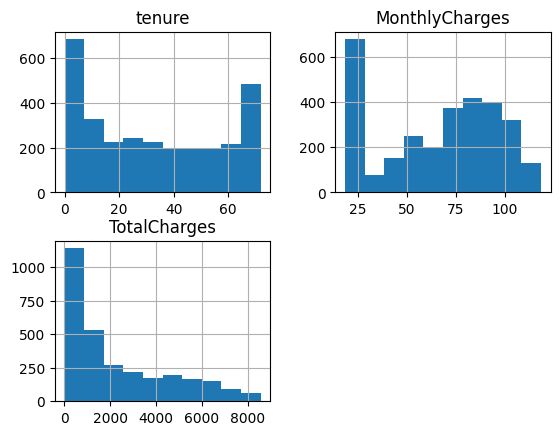

In [24]:
data1.hist()

cleaning

making sure that the 'TotalCharges' column is a product of 'Tenure' and 'MonthlyCharges'

In [25]:
data1['TotalCharge'] = data1['tenure'] * data1['MonthlyCharges']

In [26]:
data1.head() #the values are not the same, so we drop the old totalcharges column 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharge
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False,29.850000
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False,1936.300026
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True,107.699997
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False,1903.499966
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True,141.399994


In [27]:
data1.drop('TotalCharges', axis=1, inplace=True)

In [28]:

# Replace null values in 'totalcharge' with 'monthlycharge' values where 'tenure' is 0
data1.loc[(data1['tenure'] == 0) & (data1['TotalCharge'].isnull()), 'TotalCharge'] = data1['MonthlyCharges']

data1[data1['tenure'] == 0]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,TotalCharge
488,4472-LVYGI,Female,False,True,True,0,False,None,DSL,True,...,True,True,True,False,Two year,True,Bank transfer (automatic),52.549999,False,0.0
753,3115-CZMZD,Male,False,False,True,0,True,False,No,None,...,None,None,None,None,Two year,False,Mailed check,20.250000,False,0.0
936,5709-LVOEQ,Female,False,True,True,0,True,False,DSL,True,...,True,False,True,True,Two year,False,Mailed check,80.849998,False,0.0
1082,4367-NUYAO,Male,False,True,True,0,True,True,No,None,...,None,None,None,None,Two year,False,Mailed check,25.750000,False,0.0
1340,1371-DWPAZ,Female,False,True,True,0,False,None,DSL,True,...,True,True,True,False,Two year,False,Credit card (automatic),56.049999,False,0.0


In [29]:
data1['TotalCharge'].isnull().sum()

0

In [30]:

# Columns with null values
columns_with_nulls = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Filter rows where all specified columns have null values
rows_with_all_nulls = data1[data1[columns_with_nulls].isnull().all(axis=1)]

# Display rows where all specified columns have null values
rows_with_all_nulls #the nulls are  in the same rows



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,TotalCharge
11,7469-LKBCI,Male,False,False,False,16,True,False,No,None,...,None,None,None,None,Two year,False,Credit card (automatic),18.950001,False,303.200012
16,8191-XWSZG,Female,False,False,False,52,True,False,No,None,...,None,None,None,None,One year,False,Mailed check,20.650000,False,1073.799980
21,1680-VDCWW,Male,False,True,False,12,True,False,No,None,...,None,None,None,None,One year,False,Bank transfer (automatic),19.799999,False,237.599991
22,1066-JKSGK,Male,False,False,False,1,True,False,No,None,...,None,None,None,None,Month-to-month,False,Mailed check,20.150000,True,20.150000
33,7310-EGVHZ,Male,False,False,False,1,True,False,No,None,...,None,None,None,None,Month-to-month,False,Bank transfer (automatic),20.200001,False,20.200001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2984,6765-MBQNU,Female,False,True,False,26,True,True,No,None,...,None,None,None,None,One year,False,Mailed check,26.000000,False,676.000000
2987,3769-MHZNV,Female,False,True,True,33,True,False,No,None,...,None,None,None,None,Two year,False,Mailed check,20.100000,False,663.300013
2989,3308-MHOOC,Male,False,False,True,1,True,False,No,None,...,None,None,None,None,Month-to-month,True,Mailed check,19.200001,False,19.200001
2993,2239-CFOUJ,Male,False,True,True,1,True,False,No,None,...,None,None,None,None,One year,False,Mailed check,20.400000,False,20.400000


filling all the null values with false 

In [31]:


# Identify the categorical columns with missing values
categorical_columns = ["MultipleLines",  "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies","Churn"]

# Impute missing values with the mode for each categorical column
for column in categorical_columns:
    data1[column].fillna(data1[column].mode()[0], inplace=True)


In [37]:
data1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
Churn               0
TotalCharge         0
dtype: int64

Answering analytical questions 

1. Among customers who have churned, which type of contract is most prevalent? (Bar chart)

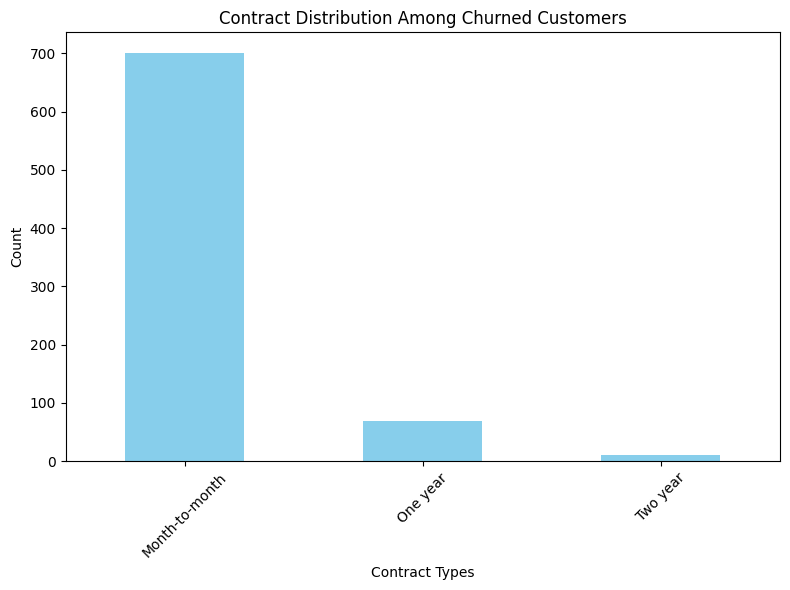

In [57]:

churned_customers = data1[data1['Churn'] == True].reset_index()


# Count the most prevalent type of contract among churned customers
contract_counts = churned_customers['Contract'].value_counts()

plt.figure(figsize=(8, 6))
contract_counts.plot(kind='bar', color='skyblue')
plt.title('Contract Distribution Among Churned Customers')
plt.xlabel('Contract Types')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



2. Which gender has the higest rate of churning


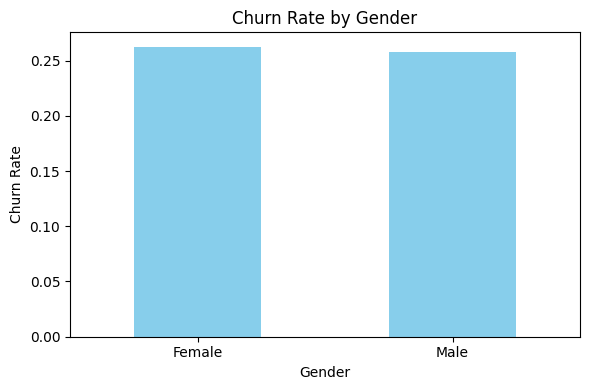

In [55]:

# Calculate churn rates by gender
churn_rates = data1.groupby('gender')['Churn'].value_counts(normalize=True).loc[:, True]

# Create a bar plot for churn rates by gender
plt.figure(figsize=(6, 4))
churn_rates.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


3. Is there a correlation between total charges and the type of contract? (Bar chart)


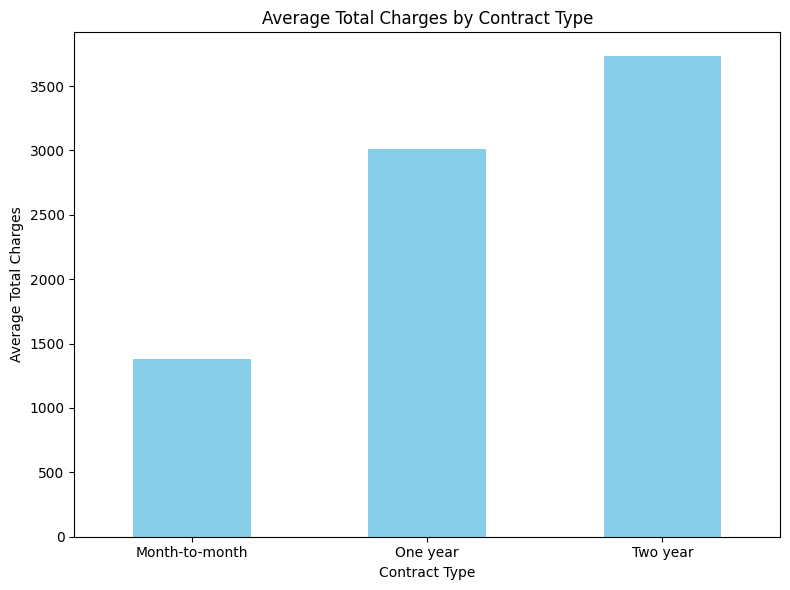

In [60]:

avg_total_charges = data1.groupby('Contract')['TotalCharge'].mean()

# Create a bar plot for average total charges by contract type
plt.figure(figsize=(8, 6))
avg_total_charges.plot(kind='bar', color='skyblue')
plt.title('Average Total Charges by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Average Total Charges')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


4. What is the percentage breakdown of customers who have left the company? (Pie chart)


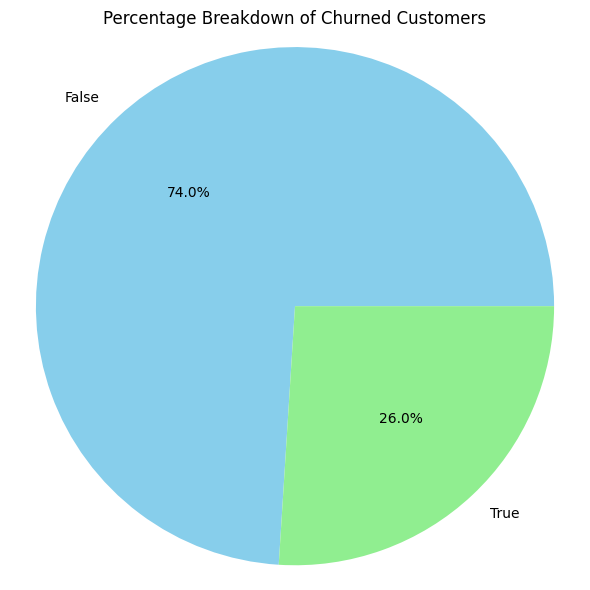

In [63]:

churn_percentage = data1['Churn'].value_counts(normalize=True) * 100


# Create a pie chart for the percentage breakdown of churned customers
plt.figure(figsize=(6, 6))
plt.pie(churn_percentage, labels=churn_percentage.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Percentage Breakdown of Churned Customers')
plt.axis('equal') 
plt.tight_layout()
plt.show()


5. How does the churn rate vary based on the duration of customer subscription (tenure)? (Line chart)


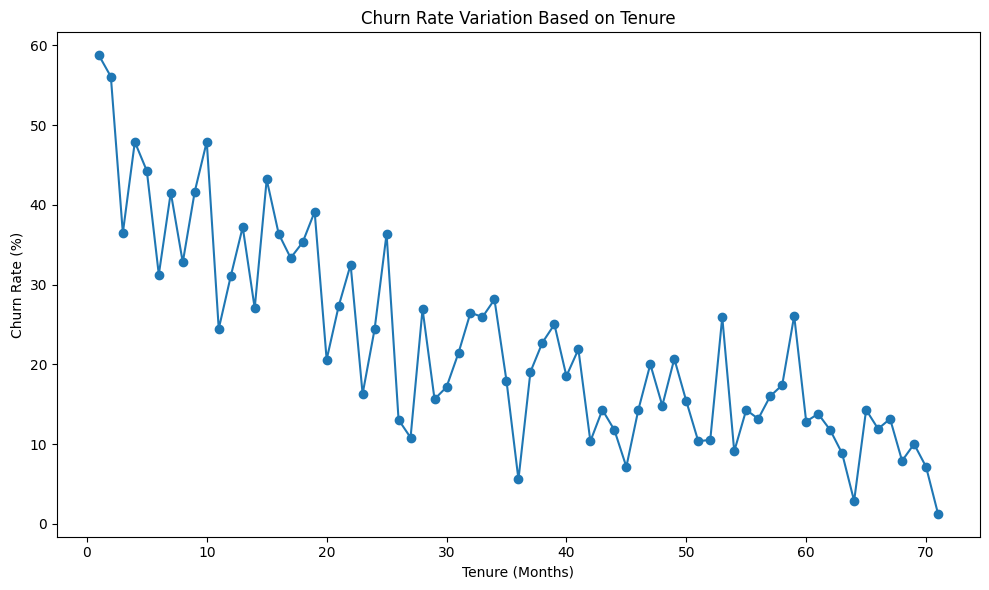

In [65]:
# Calculate churn rates for each tenure
churn_rates = data1.groupby('tenure')['Churn'].value_counts(normalize=True).loc[:, True] * 100


# Create a line chart for churn rates over tenure
plt.figure(figsize=(10, 6))
plt.plot(churn_rates.index, churn_rates.values, marker='o', linestyle='-')
plt.title('Churn Rate Variation Based on Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Churn Rate (%)')
plt.tight_layout()
plt.show()



bivariate & multivariate analysis

6. What is the distribution of services subscribed by customers based on their tenure? (Stacked bar chart)


In [68]:
# Define tenure ranges

tenure_bins = [0, 13, 25, 37, 49, 61, 73, np.inf]  # Using unique values


# Define labels for tenure ranges
tenure_labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72', '72+']

# Create a new column 'TenureRange' categorizing tenure into ranges
data1['TenureRange'] = pd.cut(data1['tenure'], bins=tenure_bins, labels=tenure_labels, right=False)


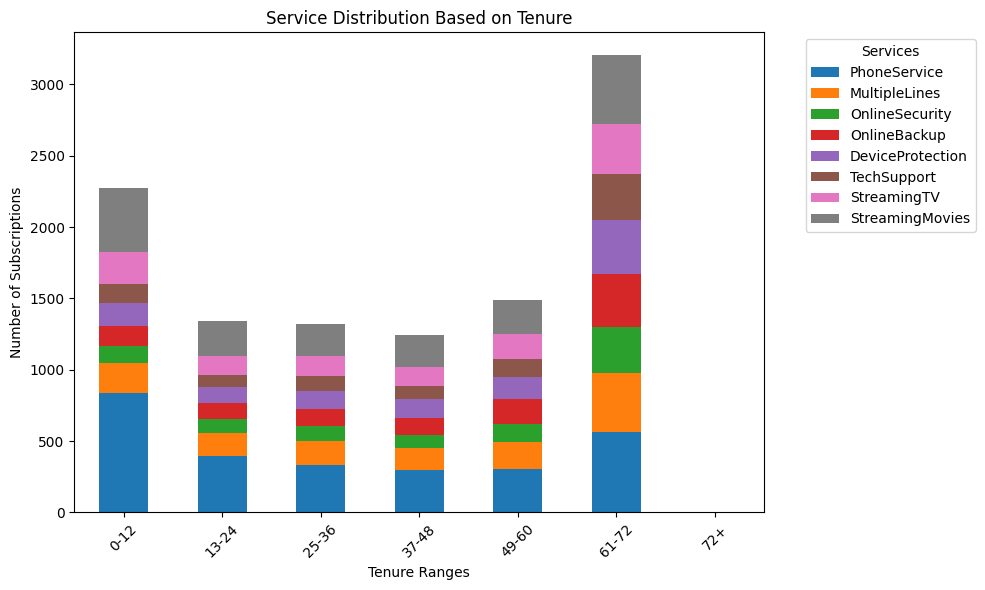

In [69]:

service_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Group by tenure and sum the service subscriptions
tenurerange_service_distribution = data1.groupby('TenureRange')[service_columns].sum()

# Create a stacked bar chart for service distribution based on tenure
tenurerange_service_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Service Distribution Based on Tenure')
plt.xlabel('Tenure Ranges')
plt.ylabel('Number of Subscriptions')
plt.legend(title='Services', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [39]:
# data1.isnull().sum()

In [40]:

# # Columns with missing values
# columns_with_missing= ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn']

# # Impute missing values with mode
# imputer = SimpleImputer(strategy='most_frequent')
# data1[columns_with_missing] = imputer.fit_transform(data1[columns_with_missing])
# data1[columns_with_missing]

### Insights

### Data preparation

In [41]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.impute import SimpleImputer
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# # Assuming 'X' contains features and 'y' is the target variable
# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize SimpleImputer to fill missing values with mean (you can choose another strategy)
# imputer = SimpleImputer(strategy='mean')

# # Fit and transform imputer on training data
# X_train_imputed = imputer.fit_transform(X_train)
# X_test_imputed = imputer.transform(X_test)

# # Initialize and train your classifier (Random Forest as an example)
# clf = RandomForestClassifier()
# clf.fit(X_train_imputed, y_train)

# # Make predictions on test set
# predictions = clf.predict(X_test_imputed)

# # Evaluate model performance
# accuracy = accuracy_score(y_test, predictions)
# print(f"Accuracy of the model: {accuracy}")


In [42]:
x=
y=
what was the previous model error
feature engineering (add columns)

SyntaxError: invalid syntax (1002873800.py, line 1)

In [ ]:
from sklearn.model_selection import train_test_split